<a href="https://colab.research.google.com/github/BenjaminVegaM/ADA-Informes/blob/main/Informe_3_MaxSubArray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de búsqueda

**Entrada**: Secuencia de n números $[a_1,a_2,...,a_n]$.

**Salida**: Sub-arreglo $[a_i,...,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.


# 2. MaxSubArray

El siguiente código muestra una implementación del algoritmo **MaxSubArray**.

## 2.1 Código de MaxSubArray

In [27]:
# MaxSubArray Code
def maxSubArray(a, lo, hi, recursiones = 0, verbose = False):
    if verbose == True:
        print("\n\nContador de Recursiones: ", recursiones)
        print("Low, High:", lo,"|", hi)
        print("Arreglo de entrada:", a[lo:(hi+1)])

    if lo == hi or len(a) == 1:
        if verbose == True: print("Arreglo es de largo 1, retornando")
        return a[lo], lo, hi, recursiones # El arreglo sólo tiene un elemento


    # Valor del centro
    mid = (int)((hi + lo)/2)
    if verbose == True: print("Mid =", mid)

    # Solucionar izquierda
    recursiones+=1
    if verbose == True: print("\nSolucionando izquierda")
    left, iLeft, jLeft, recursiones = maxSubArray(a, lo, mid, recursiones, verbose)
    if verbose == True: print("Left =", left)

    # Solucionar derecha
    recursiones+=1
    if verbose == True: print("\nSolucionando derecha")
    right, iRight, jRight, recursiones = maxSubArray(a, mid+1, hi, recursiones, verbose)
    if verbose == True: print("Right =", right)

    # Encontrar el medio
    # Esta es la función MaxSubArrayMid, la cual está implementada dentro de MaxSubArray por simplicidad
    if verbose == True:
        print("\nEncontrando medio")
        print("Arreglo:", a[lo:(hi+1)])

    largestL = a[mid]
    leftSum = 0
    iMiddle = mid

    for cont in range(mid, lo-1, -1):
        leftSum += a[cont]
        if verbose == True: print("LeftSum =", leftSum)

        if (leftSum > largestL):
            largestL = leftSum
            iMiddle = cont
    
    if verbose == True: print("Mayor suma del lado izquierdo de middle =", largestL)

    largestR = a[mid+1]
    rightSum = 0
    jMiddle = (mid+1)

    for cont in range(mid+1, hi+1, +1):
        rightSum += a[cont]
        if verbose == True: print("RightSum =", rightSum)

        if (rightSum > largestR):
            largestR = rightSum
            jMiddle = cont

    if verbose == True: print("Mayor suma del lado derecho de middle =", largestR)

    middle = (largestL + largestR)
    if verbose == True: print("Mayor suma de middle =", middle)
    if verbose == True: print("En el sub-arreglo [",iMiddle,":",jMiddle,"] =", a[iMiddle:(jMiddle+1)])

    # Return
    if verbose == True: print("\nCalculando mayor")
    if(left > right):
        if verbose == True: print("Lado izquierdo tiene el mayor sub-arreglo =", left)
        return left, iLeft, jLeft, recursiones
    elif(right > middle):
        if verbose == True: print("Lado derecho tiene el mayor sub-arreglo =", right)
        return right, iRight, jRight, recursiones
    else:
        if verbose == True: print("Centro tiene el mayor sub-arreglo =", middle)
        return middle, iMiddle, jMiddle, recursiones

In [22]:
# Ejemplo
a = [1,26,8,-42,-3,1,-56,48,12,-2,1,-56,-6,0,0,14,-23,-23,-1,40,51,-90]
c = recursiones = 0
print("Entrada: ",a)
c, i, j, recursiones = maxSubArray(a, 0, len(a)-1, recursiones, False)
print("Salida: ",c)
print("Sub-arreglo [",i,":",j,"] =", a[i:(j+1)])
print("Número de Recursiones:", recursiones)

Entrada:  [1, 26, 8, -42, -3, 1, -56, 48, 12, -2, 1, -56, -6, 0, 0, 14, -23, -23, -1, 40, 51, -90]
Salida:  91
Sub-arreglo [ 19 : 20 ] = [40, 51]
Número de Recursiones: 42


## 2.2. Descripción del Algoritmo
El algoritmo recibe como entrada un arreglo de $n$ números cuyo valor indica un aumento o una disminución, entonces:

1. Verifica si el arreglo es de largo $1$, si es así retorna el valor y los índices del primer y el último elemento (en este caso serían iguales) y el contador de recursiones.

2. De lo contrario se llama a la función **MaxSubArray** recursivamente dos veces; la primera con la mitad izquierda del arreglo y la siguiente con la mitad derecha.

3. Luego se busca el máximo sub-arreglo que pasa por el centro entre ambos lados.

4. Al final, se retorna el valor mayor entre los 3 resultados (izquierda, derecha o centro) y los índices del primer y el último elemento de este sub-arreglo, junto a un contador de las recursiones realizadas.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

In [ ]:
# Ejemplo
a = [3,-2,4,-5]
c = recursiones = 0
print("Entrada: ",a)
c, i, j, recursiones = maxSubArray(a, 0, len(a)-1, recursiones, True)
print("Salida: ",c)
print("Sub-arreglo [",i,":",j,"] =", a[i:(j+1)])
print("Número de Recursiones:", recursiones)

Entrada:  [3, -2, 4, -5]


Contador de Recursiones:  0
Low, High: 0 | 3
Arreglo de entrada: [3, -2, 4, -5]
Mid = 1

Solucionando izquierda


Contador de Recursiones:  1
Low, High: 0 | 1
Arreglo de entrada: [3, -2]
Mid = 0

Solucionando izquierda


Contador de Recursiones:  2
Low, High: 0 | 0
Arreglo de entrada: [3]
Arreglo es de largo 1, retornando
Left = 3

Solucionando derecha


Contador de Recursiones:  3
Low, High: 1 | 1
Arreglo de entrada: [-2]
Arreglo es de largo 1, retornando
Right = -2

Encontrando medio
Arreglo: [3, -2]
LeftSum = 3
Mayor suma del lado izquierdo de middle = 3
RightSum = -2
Mayor suma del lado derecho de middle = -2
Mayor suma de middle = 1
En el sub-arreglo [ 0 : 1 ] = [3, -2]

Calculando mayor
Lado izquierdo tiene el mayor sub-arreglo = 3
Left = 3

Solucionando derecha


Contador de Recursiones:  4
Low, High: 2 | 3
Arreglo de entrada: [4, -5]
Mid = 2

Solucionando izquierda


Contador de Recursiones:  5
Low, High: 2 | 2
Arreglo de entrada: [4]
Arreglo es de la

## 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$a = [3,-2,4,-5]$

Primero verifica si el largo del arreglo es igual a 1, como este no es el caso se continúa:

Despues al llamar a la función **MaxSubArray** dos veces, el camino se divide en dos partes que, con el fin de ser entendidos mejor, se llamarán "Rama 1" y "Rama 2".

En la Rama 1 se llama a la función **MaxSubArray** con el arreglo $a[lo:mid] = [3,-2]$.

En este nuevamente se verifica si el arreglo es de largo 1, como no es así entonces se vuelve a llamar a la función **MaxSubArray**, dividiendose en 2 ramas más; Rama 1.1 y Rama 1.2.

En la Rama 1.1 la función verifica si el arreglo $[3]$ es de largo 1, esto es cierto así que se retorna el valor $3$, los índices (ambos $0$) y el contador de recursiones.

Ahora la Rama 1.1 ya finalizó, se procede con la Rama 1.2 en la cual se trabaja al arreglo $[-2]$ el cual, al igual que en la Rama 1.1, es de largo 1 por lo que se retorna sin más.

En la Rama 1 ahora que se finalizó de llamar a ambos **MaxSubArray**, se busca el máximo sub-arreglo que contenga al centro entre ambos lados:

Para ello primero se recorre el sub-arreglo izquierdo $a[lo:mid]$, de derecha a izquierda, sumando todos los valores y guardando el de la máxima suma. En este caso el máximo sub-arreglo es $3$ ya que es el único elemento.

De igual manera se recorre el sub-arreglo derecho $[mid+1:hi]$ de izquierda a derecha, sumando los valores y almacenando la suma máxima que es $-2$ ya que solo hay un elemento.

Ahora se suman ambos resultados y se obtiene que la suma máxima del sub-arreglo del centro $[3,-2]$ es $1$.

Finalmente en la Rama 1 se comparan los 3 resultados y se retorna el mayor, siendo este el Izquierdo con un valor de $3$.

Se procede ahora con la Rama 2 en la cual al igual que en la Rama 1 se llama nuevamente a la función **MaxSubArray** con $[4]$ y $[-5]$, en las cuales se verifica que ambos arreglos son de largo 1 y se retorna.

Ahora se busca el máximo sub-arreglo que contiene al centro, de la misma manera que en la Rama 1. Haciendo esto se obtiene que el máximo sub-arreglo es: $[4,-5]$ con un valor de $-1$.

Finalmente en la Rama 2 se comparan los 3 resultados y se retorna el mayor, siendo este el Izquierdo con un valor de $4$.

Ahora que ambas ramas finalizaron se busca la suma máxima del centro de ambas:

Se recorre el sub-arreglo izquierdo $a[lo:mid] = [3,-2]$ guardando la suma máxima que es $3 -2 = 1$.

Srecorre el sub-arreglo derecho $[mid+1:hi] = [4,-5]$ de izquierda a derecha, cuya suma máxima que es $4$.

Ambos resultados sumados dan $5$.

Por último se comparan los 3 resultados:

$Izquierda = 1$

$Derecha = -1$

$Centro = 5$

y se retorna el valor del centro ($5$), los índices $0$ y $2$ y el contador de recursiones, con ello finaliza el algoritmo.

## 2.4. Ejecución del Algoritmo Paso a Paso (verbose = True)

Al utilizar la opción `verbose=True` se puede ver paso a paso lo que le ocurre al arreglo en cada iteración del algoritmo.

In [ ]:
# Ejemplo
a = [1,3,-2,4,6,-2,0,-2]
c = recursiones = 0
print("Entrada: ",a)
c, i, j, recursiones = maxSubArray(a, 0, len(a)-1, recursiones, True)
print("Salida: ",c)
print("Sub-arreglo [",i,":",j,"] =", a[i:(j+1)])
print("Número de Recursiones:", recursiones)

Entrada:  [1, 3, -2, 4, 6, -2, 0, -2]


Contador de Recursiones:  0
Low, High: 0 | 7
Arreglo de entrada: [1, 3, -2, 4, 6, -2, 0, -2]
Mid = 3

Solucionando izquierda


Contador de Recursiones:  1
Low, High: 0 | 3
Arreglo de entrada: [1, 3, -2, 4]
Mid = 1

Solucionando izquierda


Contador de Recursiones:  2
Low, High: 0 | 1
Arreglo de entrada: [1, 3]
Mid = 0

Solucionando izquierda


Contador de Recursiones:  3
Low, High: 0 | 0
Arreglo de entrada: [1]
Arreglo es de largo 1, retornando
Left = 1

Solucionando derecha


Contador de Recursiones:  4
Low, High: 1 | 1
Arreglo de entrada: [3]
Arreglo es de largo 1, retornando
Right = 3

Encontrando medio
Arreglo: [1, 3]
LeftSum = 1
Mayor suma del lado izquierdo de middle = 1
RightSum = 3
Mayor suma del lado derecho de middle = 3
Mayor suma de middle = 4
En el sub-arreglo [ 0 : 1 ] = [1, 3]

Calculando mayor
Centro tiene el mayor sub-arreglo = 4
Left = 4

Solucionando derecha


Contador de Recursiones:  5
Low, High: 2 | 3
Arreglo de entrada: [-2

# 3. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

*El algoritmo **MaxSubArray** tiene un **tiempo de ejecución de** $O(n*log(n))$ en el peor caso.*

## Prueba del teorema

Para comprobar el teorema, se puede utilizar el **Teorema Maestro**, para ello primero se debe obtener la fórmula de recurrencia del algoritmo.

### Fórumla de recurrencia

La fórmula de recurrencia **T(n)** del algoritmo se obtiene analizando sus partes.

Para el caso base $n=1$ el algoritmo solo pregunta si el arreglo es de largo $1$ y luego retorna los valores sin realizar ninguna recursión, por esto se obtiene que $T(n)=O(1)$ si $n=1$.

Para el resto de casos se tiene que:

- El algoritmo divide el problema ($n$) en $2$ subproblemas, los cuales son $1/2$ del problema original, por lo cual el algoritmo tardará $2T(n/2)$ en resolver ambos sub-problemas.

- Luego el algoritmo busca el máximo sub-arreglo que cruza ambos lados, lo cual tiene una complejidad de $O(n)$.

Gracias a este analisis se obtiene que $T(n) = 2T(n/2) + O(n)$.

### Teorema Maestro

Utilizando el teorema maestro se puede obtener la complejidad temporal del algoritmo:

Se tiene $T(n) \leq aT(n/b)+O(n^d)$ donde $a=2$, $b=2$ y $d=1$.

Ya que $2 = 2^1$, la complejidad temporal es $O(n*log(n))$.


# 4. Correctitud


## 4.1. Teorema 1 (Correctitud de MaxSubArray)

La función **MaxSubArray** retorna el primer y último índice del sub-arreglo con la mayor suma contigua dentro del arreglo de entrada, tal que $0 \leq i \leq j \leq n$ y $\sum\limits_{x=i}^{j} a[x]$ sea igual o mayor a cualquier otra.

## 4.2. Prueba del teorema 1 por medio de Inducción

La hipótesis $T(n)$ se basa en que **MaxSubArray** retorna un arreglo de $n$ elementos ordenados de menor a mayor.

### Caso base $n = 1$
Si $T(1)$ la función **MaxSubArray** retorna un sólo elemento, por lo que se cumpliría la condición.

Caso base $(n = 1)$: Cuando el largo del algoritmo es 1, y queremos conseguir la mayor suma de elementos consecutivos. La respuesta es el mismo elemento del arreglo.

### Resto de casos
Asumimos que el algoritmo entregará la respuesta correcta para cualquier arreglo de largo $n \geq 1$. Este algoritmo tiene 3 pasos, uno en el que se llama a sí mismo para buscar la respuesta en en lado izquierdo del arreglo, otro para el lado derecho. Y la llamada a MaxSubArrayMid que lo busca para un arreglo que pasar por el medio, asumiremos que este algoritmo encontrará el valor de la mayor suma del subarreglo que pasa por el medio.

Pasos 1 y 2: el propósito de estas llamadas, son para encontrar los subarreglos que posean las mayores sumas de los lados izquierdos y derechos del algoritmo, por la hipótesis inductivas sabemos que esta llamada encontrará y retornará el valor de la suma y los índices de los subarreglos para los lados izquierdos y derechos.

Paso 3: se llama a la función MaxSubArrayMid, que busca la mayor suma que puede tener un subarreglo que pase por el medio del arreglo. Asumimos que entregará la respuesta correcta.

Ahora tenemos tres posibles respuestas, que compararemos para retornar el valor que corresponda.

## 4.3 Teorema 2 (Correctitud de MaxSubArrayMid)

La función **MaxSubArrayMid** (implementada directamente entre la linea 29 y 65) retorna el sub-arreglo con la mayor suma contigua que contiene a al centro del sub-arreglo $a[lo:hi]$, esa decir contiene a $a[mid]$ y $a[mid+1]$, tal que $0 \leq i \leq mid \leq j \leq n$ y $\sum\limits_{x=i}^{j} a[x]$ sea igual o mayor a cualquier otra.

### 4.4 Prueba del teorema 2 por medio de Inducción

Se asume que **MaxSubArrayMid** recibe dos índices $lo$ y $hi$ que representan la primera posición del sub-arreglo izquierdo y la última posición del sub-arreglo derecho respectivamente, y que ambos sub-arreglos son contiguos, es decir, luego del último elemento del sub-arreglo izquierdo se encuentra el primer elemento del sub-arreglo derecho, además de una variable $mid$ que representa el punto de división entre ambos arreglos.

Primero se revisa el sub-arreglo izquierdo desde $a[mid]$ hasta $a[i]$ y se almacena la mayor suma dentro de una variable llamada $largestI$ y el índice de esta.

Luego se revisa el sub-arreglo derecho desde $a[mid+1]$ hasta $a[j]$ y se almacena la mayor suma dentro de una variable llamada $largestR$ y el índice de esta.

Finalmente se suman $largestI$ y $largestR$ y se tendrá el valor de la máxima suma del sub-arreglo que contiene el centro, junto con los índices de este.

# 5. Experimentos

## 5.1. Número de recursiones

La gráfica de acontinuación muestra una comparación entre:

* la cantidad de recursiones realizadas en el peor caso calculadas matemáticamente,
* la cantidad de recursiones realizadas en el mejor caso calculadas matemáticamente
* y la cantidad de recursiones realizadas en casos de prueba realizados con entradas aleatorias

para problemas con arreglos de entrada de largo $n \in [2,50]$ en los cuales el valor de los elementos es elejido aleatoriamente desde un conjunto de números entre $-100$ y $+100$.

El algoritmo se llama a si mismo $2$ veces excepto cuando el arreglo es de largo $1$, por lo que para un arreglo de largo $n$, el algoritmo realizaría $2n-2$ recursiones, y esto es independiente del valor de los elementos del arreglo, por ello no existe un mejor o peor caso, todos los casos de largo $n$ realizan la misma cantidad de recursiones.

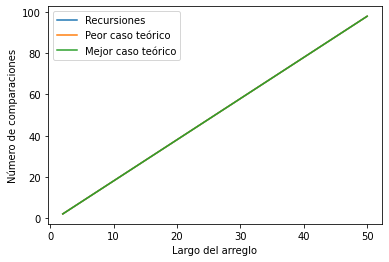

In [48]:
import matplotlib.pyplot as plt
import random

rangeS = 2
rangeF = 51
x=[n for n in range(rangeS,rangeF)]
# Peor Caso
y1=[((2*n)-2) for n in range(rangeS,rangeF)]
# Mejor caso
y2=[((2*n)-2) for n in range(rangeS,rangeF)]
# Muestras
yc=[];


for n in range(rangeS,rangeF):
  a = random.sample(range(-100, 100), n)
  suma = lo = hi = recursiones = 0
  a, lo, hi, recursiones = maxSubArray(a, 0, len((a))-1, recursiones, False)
  yc.append(recursiones)

plt.plot(x,yc)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Recursiones", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel('Largo del arreglo')
plt.ylabel('Número de comparaciones')
plt.show()

### Analisis del gráfico

Los resultados que muestra el grafico indican que la cantidad de recursiones se mantiene siempre igual tanto en el mejor como en el peor caso, tal como lo decía el analisis teórico, por lo que no existe un mejor o peor caso para diferentes arreglos de largo $n$.

## 5.2. Tiempo de ejecución experimental

El siguiente gráfico muestra el comportamiento del tiempo de ejecución del algoritmo en relación al tamaño del arreglo de entrada, esto utilizando problemas generados aleatoriamente de arreglos de largo $n \in [5,500]$, cuyos elementos son números aleatorios entre $-500$ y $+500$.

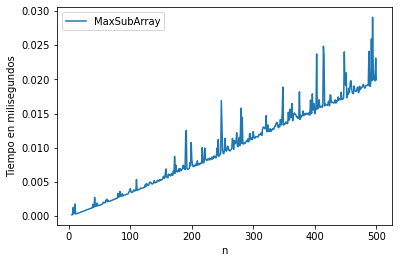

In [53]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[];
y=[];

for n in range(5,501):
  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces insert_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a}, 0, len({a})-1)", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["MaxSubArray"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

Al ver el gráfico se puede observar que al igual que en el análisis teórico, el tiempo de ejecución experimental se comporta de manera logarítmica en relación al tamaño del arreglo de entrada.

Cabe notar que existen un par de puntos muy altos en la gráfica los cuales son muy posiblemente debidos al comportamiento impredecible de los procesadores y quizás a otros procesos que también lo están ocupando.

# 5.3. Comparación de tiempo de ejecución con el Algoritmo de Kadane

El siguiente gráfico muestra una comparación entre los tiempos de ejecución de los algoritmos **MaxSubArray** y el de **Kadane**.


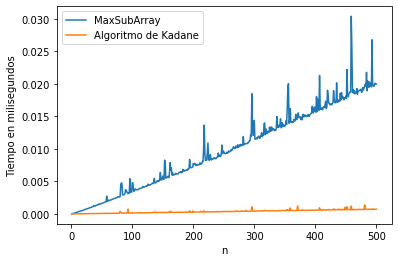

In [55]:
import datetime
import matplotlib.pyplot as plt
import random
from timeit import repeat
from sys import maxsize

# Python program to find maximum contiguous subarray
   
# Function to find the maximum contiguous subarray
def kadane(a):

    max_so_far = -maxsize - 1
    max_ending_here = 0

    for i in range(0, len(a)):
        max_ending_here = max_ending_here + a[i]
        if (max_so_far < max_ending_here):
            max_so_far = max_ending_here

        if max_ending_here < 0:
            max_ending_here = 0
    return max_so_far
   
#This code is contributed by _Devesh Agrawal_

x=[];
y=[];
yb=[];

for n in range(1,501):
  a = random.sample(range(-500, 500), n)
  x.append(n)

  #la función repeat está ejecutando 20 veces insert_sort con el arreglo a y retorna el mejor tiempo obtenido.
  t = repeat(setup="from __main__ import maxSubArray", stmt=f"maxSubArray({a}, 0, len({a})-1)", repeat=1, number=10)
  y.append(t)
  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  yb.append(t)

plt.plot(x,y)
plt.plot(x,yb)
plt.legend(["MaxSubArray", "Algoritmo de Kadane"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Analisis del gráfico

En el gráfico se puede apreciar como el algoritmo **MaxSubArray** tiene un mayor tiempo de ejecución en comparación al **algoritmo de Kadane** y esta diferencia crece linealmente, por lo que mientras más grande sea el arreglo de entrada, mayor será la diferencia de tiempos de ejecución entre ambos algoritmos. Por esto se puede afirmar que el **algoritmo de Kadane** es mejor para encontrar el sub-arreglo con la suma máxima. 